<a href="https://colab.research.google.com/github/melli0505/DataStructure/blob/master/SRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'
model_path = root_path + 'weights/'
image_path = root_path + '91/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


(50, 50)


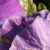

(50, 50)


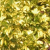

(50, 50)


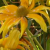

(50, 50)


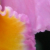

(50, 50)


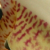

(50, 50)


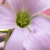

(50, 50)


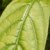

(50, 50)


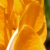

(50, 50)


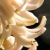

(50, 50)


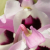

(50, 50)


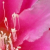

(50, 50)


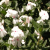

(50, 50)


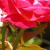

(50, 50)


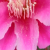

(50, 50)


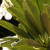

(50, 50)


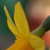

(50, 50)


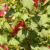

(50, 50)


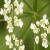

(50, 50)


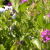

(50, 50)


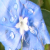

(50, 50)


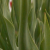

(50, 50)


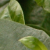

(50, 50)


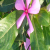

(50, 50)


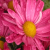

(50, 50)


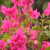

(50, 50)


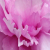

(50, 50)


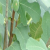

(50, 50)


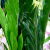

(50, 50)


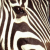

(50, 50)


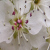

(50, 50)


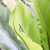

(50, 50)


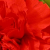

(50, 50)


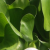

(50, 50)


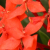

(50, 50)


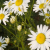

(50, 50)


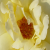

(50, 50)


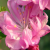

(50, 50)


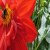

(50, 50)


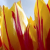

(50, 50)


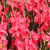

(50, 50)


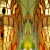

(50, 50)


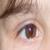

(50, 50)


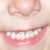

(50, 50)


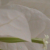

(50, 50)


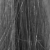

(50, 50)


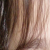

(50, 50)


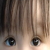

(50, 50)


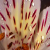

(50, 50)


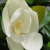

(50, 50)


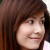

(50, 50)


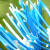

(50, 50)


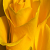

(50, 50)


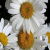

(50, 50)


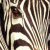

(50, 50)


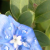

(50, 50)


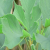

(50, 50)


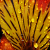

(50, 50)


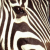

(50, 50)


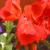

(50, 50)


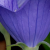

(50, 50)


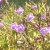

(50, 50)


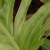

(50, 50)


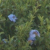

(50, 50)


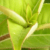

(50, 50)


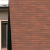

(50, 50)


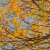

(50, 50)


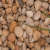

(50, 50)


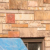

(50, 50)


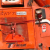

(50, 50)


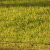

(50, 50)


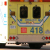

(50, 50)


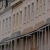

(50, 50)


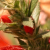

(50, 50)


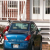

(50, 50)


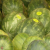

(50, 50)


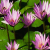

(50, 50)


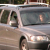

(50, 50)


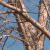

(50, 50)


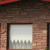

(50, 50)


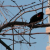

(50, 50)


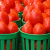

(50, 50)


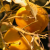

(50, 50)


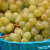

(50, 50)


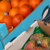

(50, 50)


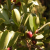

(50, 50)


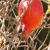

(50, 50)


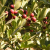

(50, 50)


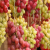

(50, 50)


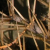

(50, 50)


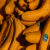

(50, 50)


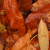

In [ ]:
import glob
import cv2
from google.colab.patches import cv2_imshow

for img_file in glob.glob(image_path + '*.png'):
    img = cv2.imread(img_file)
    img = cv2.resize(img, (50, 50), 1, 1, interpolation = cv2.INTER_AREA)
    print(img.shape[:2])
    cv2_imshow(img)

W0813 07:35:03.230976 139648572307328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Learning Started!
Epoch: [ 4], step: [10], time: [8.2990], loss: [20238.55273438]
Epoch: [ 7], step: [20], time: [9.8223], loss: [20189.01757812]
Epoch: [10], step: [30], time: [11.3410], loss: [15909.70019531]
Epoch: [14], step: [40], time: [12.8643], loss: [20225.20703125]
Epoch: [17], step: [50], time: [14.3870], loss: [20160.24804688]
Epoch: [20], step: [60], time: [15.9123], loss: [15866.27343750]
Epoch: [24], step: [70], time: [17.4383], loss: [20125.76367188]
Epoch: [27], step: [80], time: [18.9580], loss: [20005.04101562]
Epoch: [30], step: [90], time: [20.4832], loss: [15684.06738281]
Epoch: [34], step: [100], time: [22.0124], loss: [19781.31054688]
Epoch: [37], step: [110], time: [23.5400], loss: [19543.59765625]
Epoch: [40], step: [120], time: [25.0753], loss: [15206.65722656]
Epoch: [44], step: [130], time: [26.6127], loss: [18965.37109375]
Epoch: [47], step: [140], time: [28.1475], loss: [18542.50585938]
Epoch: [50], step: [150], time: [29.6832], loss: [14246.91210938]
Epo

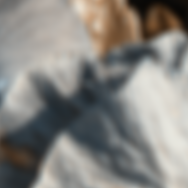

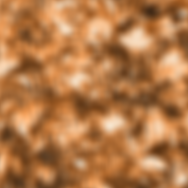

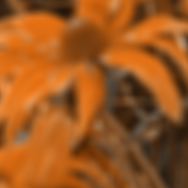

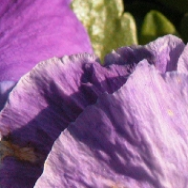

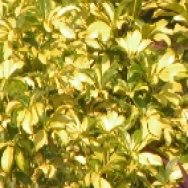

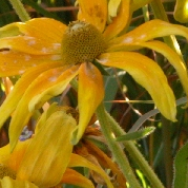

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time

from google.colab.patches import cv2_imshow
import cv2
import glob

# from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

tf.reset_default_graph()

f1 = 9
f2 = 1
f3 = 5
n1 = 64
n2 = 32
image_channel = 3
f_sub = 33

image_size = 200
label_size = 188

original_list = []
label_list = []

for img_file in glob.glob(image_path+'*.png'):
    img = cv2.imread(img_file)
    img_original = cv2.resize(img, (image_size, image_size), 1, 1, interpolation=cv2.INTER_AREA)
    img_label = cv2.resize(img, (label_size, label_size), 1, 1, interpolation=cv2.INTER_AREA)
    original_list.append(img_original)
    label_list.append(img_label)
    

images = tf.placeholder(tf.float32, [None, image_size, image_size, image_channel], name='images')
labels = tf.placeholder(tf.float32, [None, label_size, label_size, image_channel], name='labels')


W1 = tf.Variable(tf.random_normal([f1, f1, image_channel, n1], stddev=0.001))
b1 = tf.Variable(tf.zeros([64], name='b1'))
conv1 = tf.nn.conv2d(images, W1, strides=[1,1,1,1], padding='VALID') + b1
relu1 = tf.nn.relu(conv1)

W2 = tf.Variable(tf.random_normal([f2, f2, n1, n2], stddev=0.001))
b2 = tf.Variable(tf.zeros([n2], name='b2'))
conv2 = tf.nn.conv2d(relu1, W2, strides=[1,1,1,1], padding='VALID') + b2
relu2 = tf.nn.relu(conv2)

W3 = tf.Variable(tf.random_normal([f3, f3, n2, image_channel], stddev=0.001))
b3 = tf.Variable(tf.zeros([image_channel], name='b3'))
conv3 = tf.nn.conv2d(relu2, W3, strides=[1,1,1,1], padding='VALID') + b3

# conv3_flat = tf.reshape(L2, [-1, 7* 7 * 128]) #😄

learning_rate1 = 0.0001
learning_rate2 = 0.00001
batch_size = 30
training_epochs = 1000
counter = 0
time_ = time.time()

loss = tf.losses.mean_squared_error(labels=labels, predictions=conv3)
# optimizer1 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate1).minimize(loss)
optimizer1 = tf.train.AdamOptimizer(learning_rate=learning_rate2).minimize(loss)
# optimizers = tf.group(optimizer1, optimizer2)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning Started!')

for ep in range(training_epochs):
    # Run by batch images
    batch_idxs = len(original_list) // batch_size
    for idx in range(0, batch_idxs):
        batch_images = original_list[idx * batch_size : (idx + 1) * batch_size]
        batch_labels = label_list[idx * batch_size : (idx + 1) * batch_size]
        counter += 1
        _, err = sess.run([optimizer1, loss], feed_dict={images: batch_images, labels: batch_labels})
        
        if counter % 10 == 0:
            print("Epoch: [%2d], step: [%2d], time: [%4.4f], loss: [%.8f]" % ((ep+1), counter, time.time()-time_, err))
            #print(label_[1] - self.pred.eval({self.images: input_})[1],'loss:]',err)
    if ep % 300 == 0:
        learning_rate2 = learning_rate2 * 0.1
            
print('Learning Finished!')


print("Now Start Testing...")
prediction = sess.run(conv3, feed_dict={images: original_list[0:3]})

for img in prediction, label_list:
    cv2_imshow(img[0])
    print()
    cv2_imshow(img[1])
    print()
    cv2_imshow(img[2])
    print()